In [1]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
df=pd.read_csv("clean_titanic.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mrs,0
1,1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mrs,0
2,2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mrs,0
3,3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs,4
4,4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,1


In [2]:
cleanup={"Title":{"Mrs":1, "Miss": 0, "Officer": 2, "Royalty": 3, "Master": 4}}
df.replace(cleanup, inplace=True)
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,male,28.0,0,0,248740,13.0000,S,1,0
1,1,76,0,3,male,25.0,0,0,348123,7.6500,S,1,0
2,2,641,0,3,male,20.0,0,0,350050,7.8542,S,1,0
3,3,568,0,3,female,29.0,0,4,349909,21.0750,S,1,4
4,4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,1,1


In [3]:
cleanup={"Sex":{"male":1, "female": 0,}}
df.replace(cleanup, inplace=True)
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,0,343,0,2,1,28.0,0,0,248740,13.0000,S,1,0
1,1,76,0,3,1,25.0,0,0,348123,7.6500,S,1,0
2,2,641,0,3,1,20.0,0,0,350050,7.8542,S,1,0
3,3,568,0,3,0,29.0,0,4,349909,21.0750,S,1,4
4,4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,S,1,1


In [4]:
x = df[['Age', 'Pclass','Fare','Title','Sex','FamilySize']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.86


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

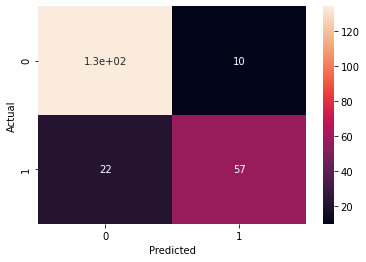

In [5]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       144
           1       0.85      0.72      0.78        79

    accuracy                           0.86       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.86      0.86      0.85       223



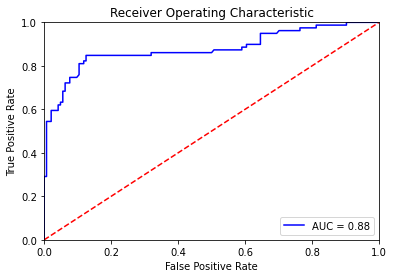

In [7]:
probs =logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
df.to_csv('./new_clean_titanic.csv')